C:\Users\user\AppData\Local\Temp\ipykernel_21224\2992472357.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_label', y='log_cons_12m', palette=['lightblue', 'salmon'], ax=axes[1, 1])


ValueError: Could not interpret value `max_volatility` for `y`. An entry with this name does not appear in `data`.

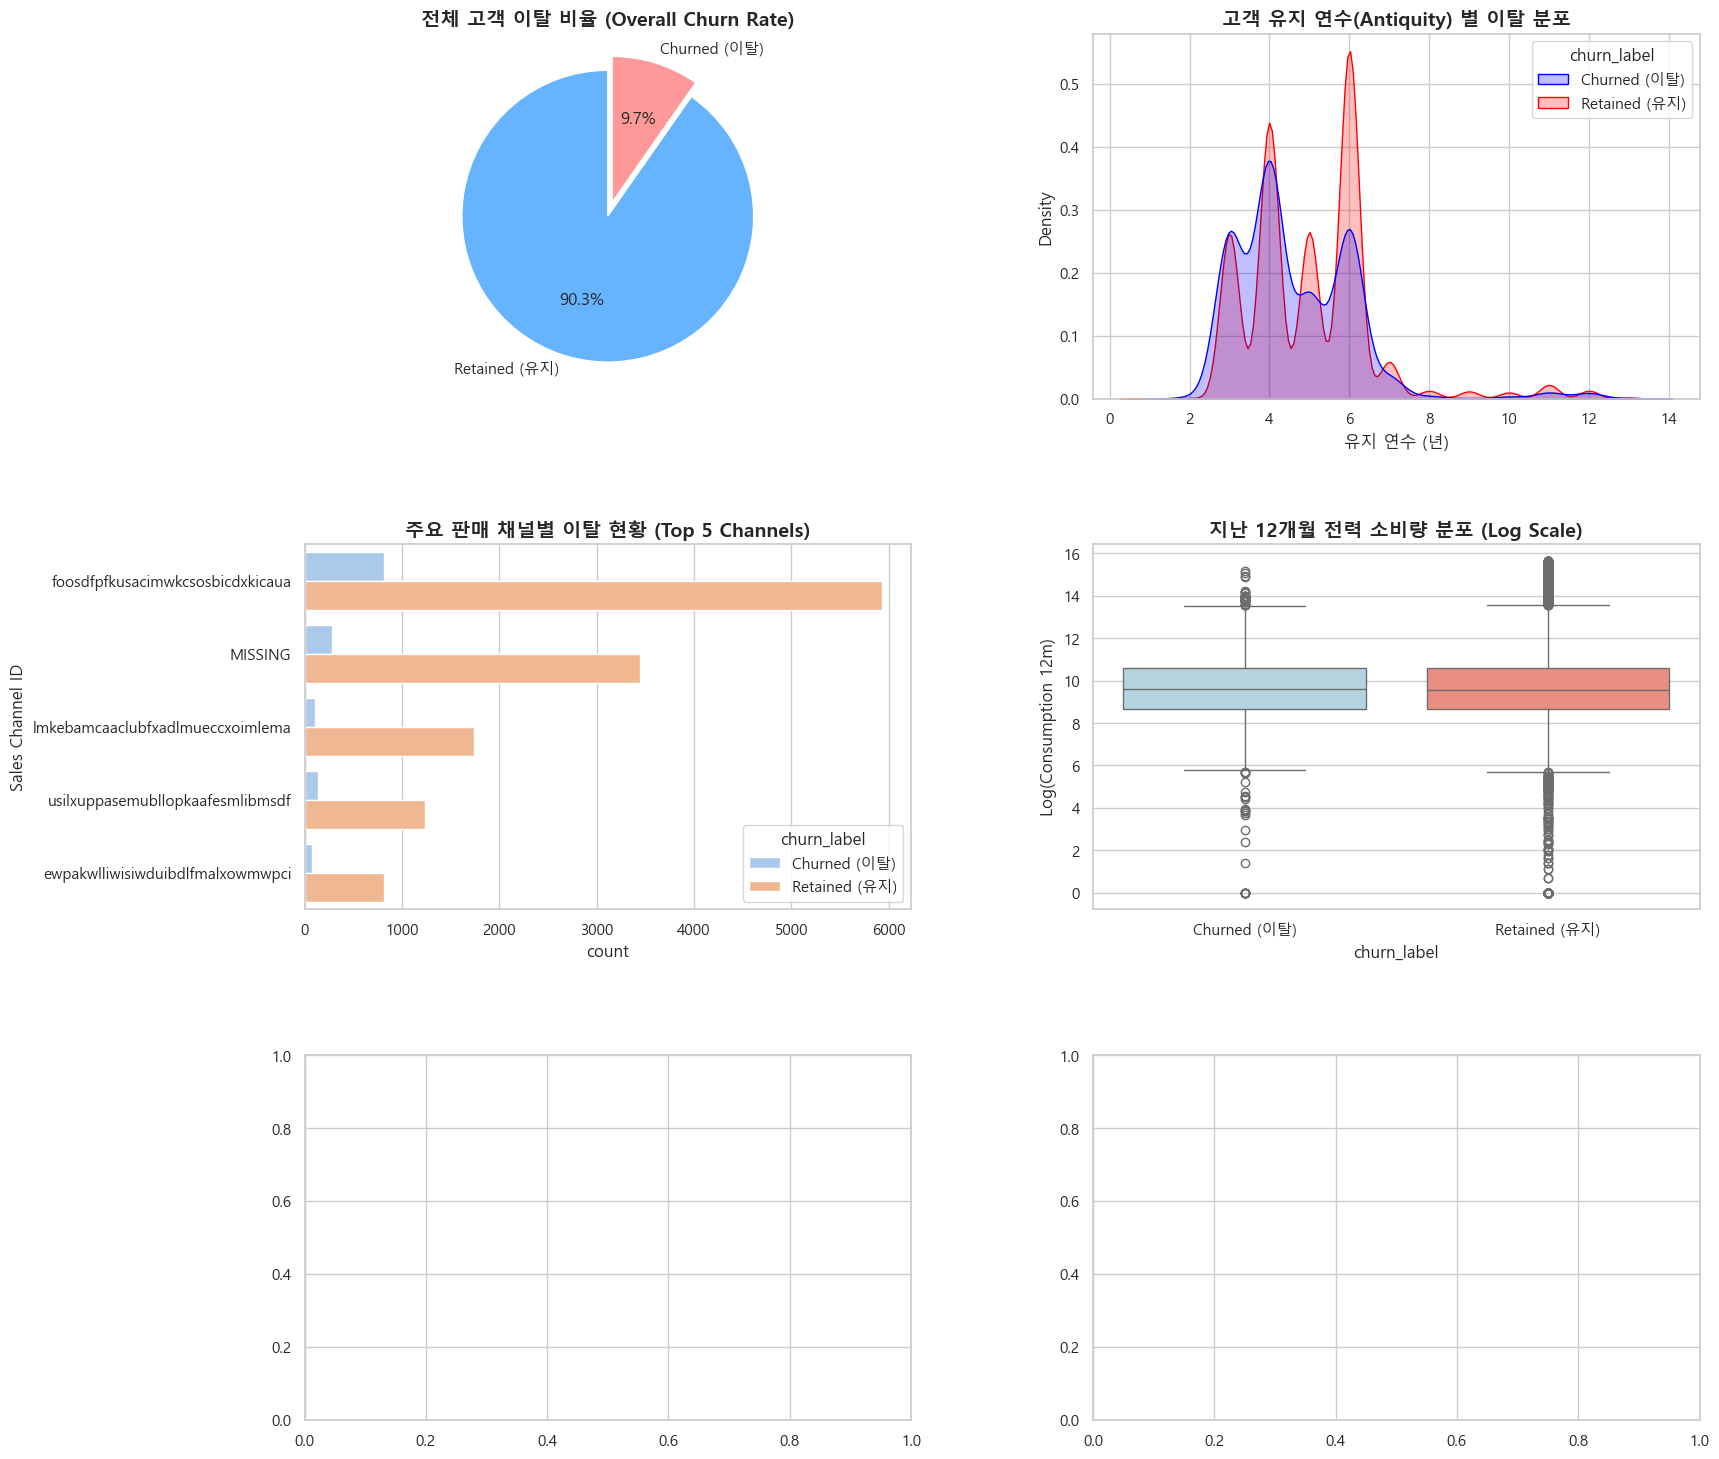

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드
file_path = '../data/02_processed/churn_data_modeling.csv'
df = pd.read_csv(file_path)

# 시각화 설정
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 (환경에 따라 영문으로 대체될 수 있음)
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 Churn 라벨링 (0: 유지, 1: 이탈)
df['churn_label'] = df['churn'].map({0: 'Retained (유지)', 1: 'Churned (이탈)'})

# 서브플랏 설정 (3행 2열)
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- 1. 전체 이탈률 (Pie Chart) ---
churn_counts = df['churn_label'].value_counts()
colors = ['#66b3ff', '#ff9999']
axes[0, 0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
axes[0, 0].set_title('전체 고객 이탈 비율 (Overall Churn Rate)', fontsize=14, fontweight='bold')

# --- 2. 가입 기간(Tenure)에 따른 이탈 분포 (KDE Plot) ---
sns.kdeplot(data=df, x='num_years_antig', hue='churn_label', fill=True, common_norm=False, palette=['blue', 'red'], ax=axes[0, 1])
axes[0, 1].set_title('고객 유지 연수(Antiquity) 별 이탈 분포', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('유지 연수 (년)')

# --- 3. 판매 채널별 이탈률 (Count Plot) ---
sns.countplot(data=df, y='channel_sales', hue='churn_label', palette='pastel', ax=axes[1, 0], order=df['channel_sales'].value_counts().index[:5])
axes[1, 0].set_title('주요 판매 채널별 이탈 현황 (Top 5 Channels)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Sales Channel ID')

# --- 4. 전력 소비량과 이탈의 관계 (Box Plot - Log Scale) ---
# 소비량 데이터는 편차가 크므로 로그 스케일 적용이 유리함
df['log_cons_12m'] = np.log1p(df['cons_12m'])
sns.boxplot(data=df, x='churn_label', y='log_cons_12m', palette=['lightblue', 'salmon'], ax=axes[1, 1])
axes[1, 1].set_title('지난 12개월 전력 소비량 분포 (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Log(Consumption 12m)')

# --- 5. 가격 변동성(Max Volatility)과 이탈 (Box Plot) ---
sns.boxplot(data=df, x='churn_label', y='max_volatility', palette=['lightblue', 'salmon'], ax=axes[2, 0], showfliers=False)
axes[2, 0].set_title('가격 변동성(Max Volatility)에 따른 이탈 차이', fontsize=14, fontweight='bold')
axes[2, 0].set_ylabel('Max Price Volatility')

# --- 6. 가격 충격(Price Shock)과 이탈 (Bar Chart) ---
# 0: 하락, 1: 변동없음, 2: 상승
shock_churn = df.groupby(['price_shock_encoded', 'churn_label']).size().unstack(fill_value=0)
shock_churn_ratio = shock_churn.div(shock_churn.sum(axis=1), axis=0) * 100 # 비율 계산

shock_churn_ratio.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], ax=axes[2, 1])
axes[2, 1].set_title('가격 충격(Price Shock)별 이탈 비율', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Price Shock (0:Down, 1:Same, 2:Up)')
axes[2, 1].set_ylabel('Percentage (%)')
axes[2, 1].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 간단한 통계 출력
print(f"전체 데이터 수: {len(df)}")
print(f"이탈 고객 수: {df['churn'].sum()} ({df['churn'].mean()*100:.2f}%)")
print("\n[변수별 상관관계 Top 5 (vs Churn)]")
# 수치형 컬럼만 선택하여 상관관계 계산
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['churn'].sort_values(ascending=False)
print(correlations.head(6)) # 자기 자신(churn) 제외하고 상위 5개 확인
print(correlations.tail(5))

True


C:\Users\user\AppData\Local\Temp\ipykernel_14592\144464900.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gas_churn.index, y=gas_churn.values, palette=['#ff9999', '#66b3ff'], ax=axes[0, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_14592\144464900.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_churn.values, y=origin_churn.index, palette='viridis', ax=axes[2, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_14592\144464900.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_yticklabels([label[:10] + '...' for label in origin_churn.index])
c:\Users\user\miniconda3\envs\

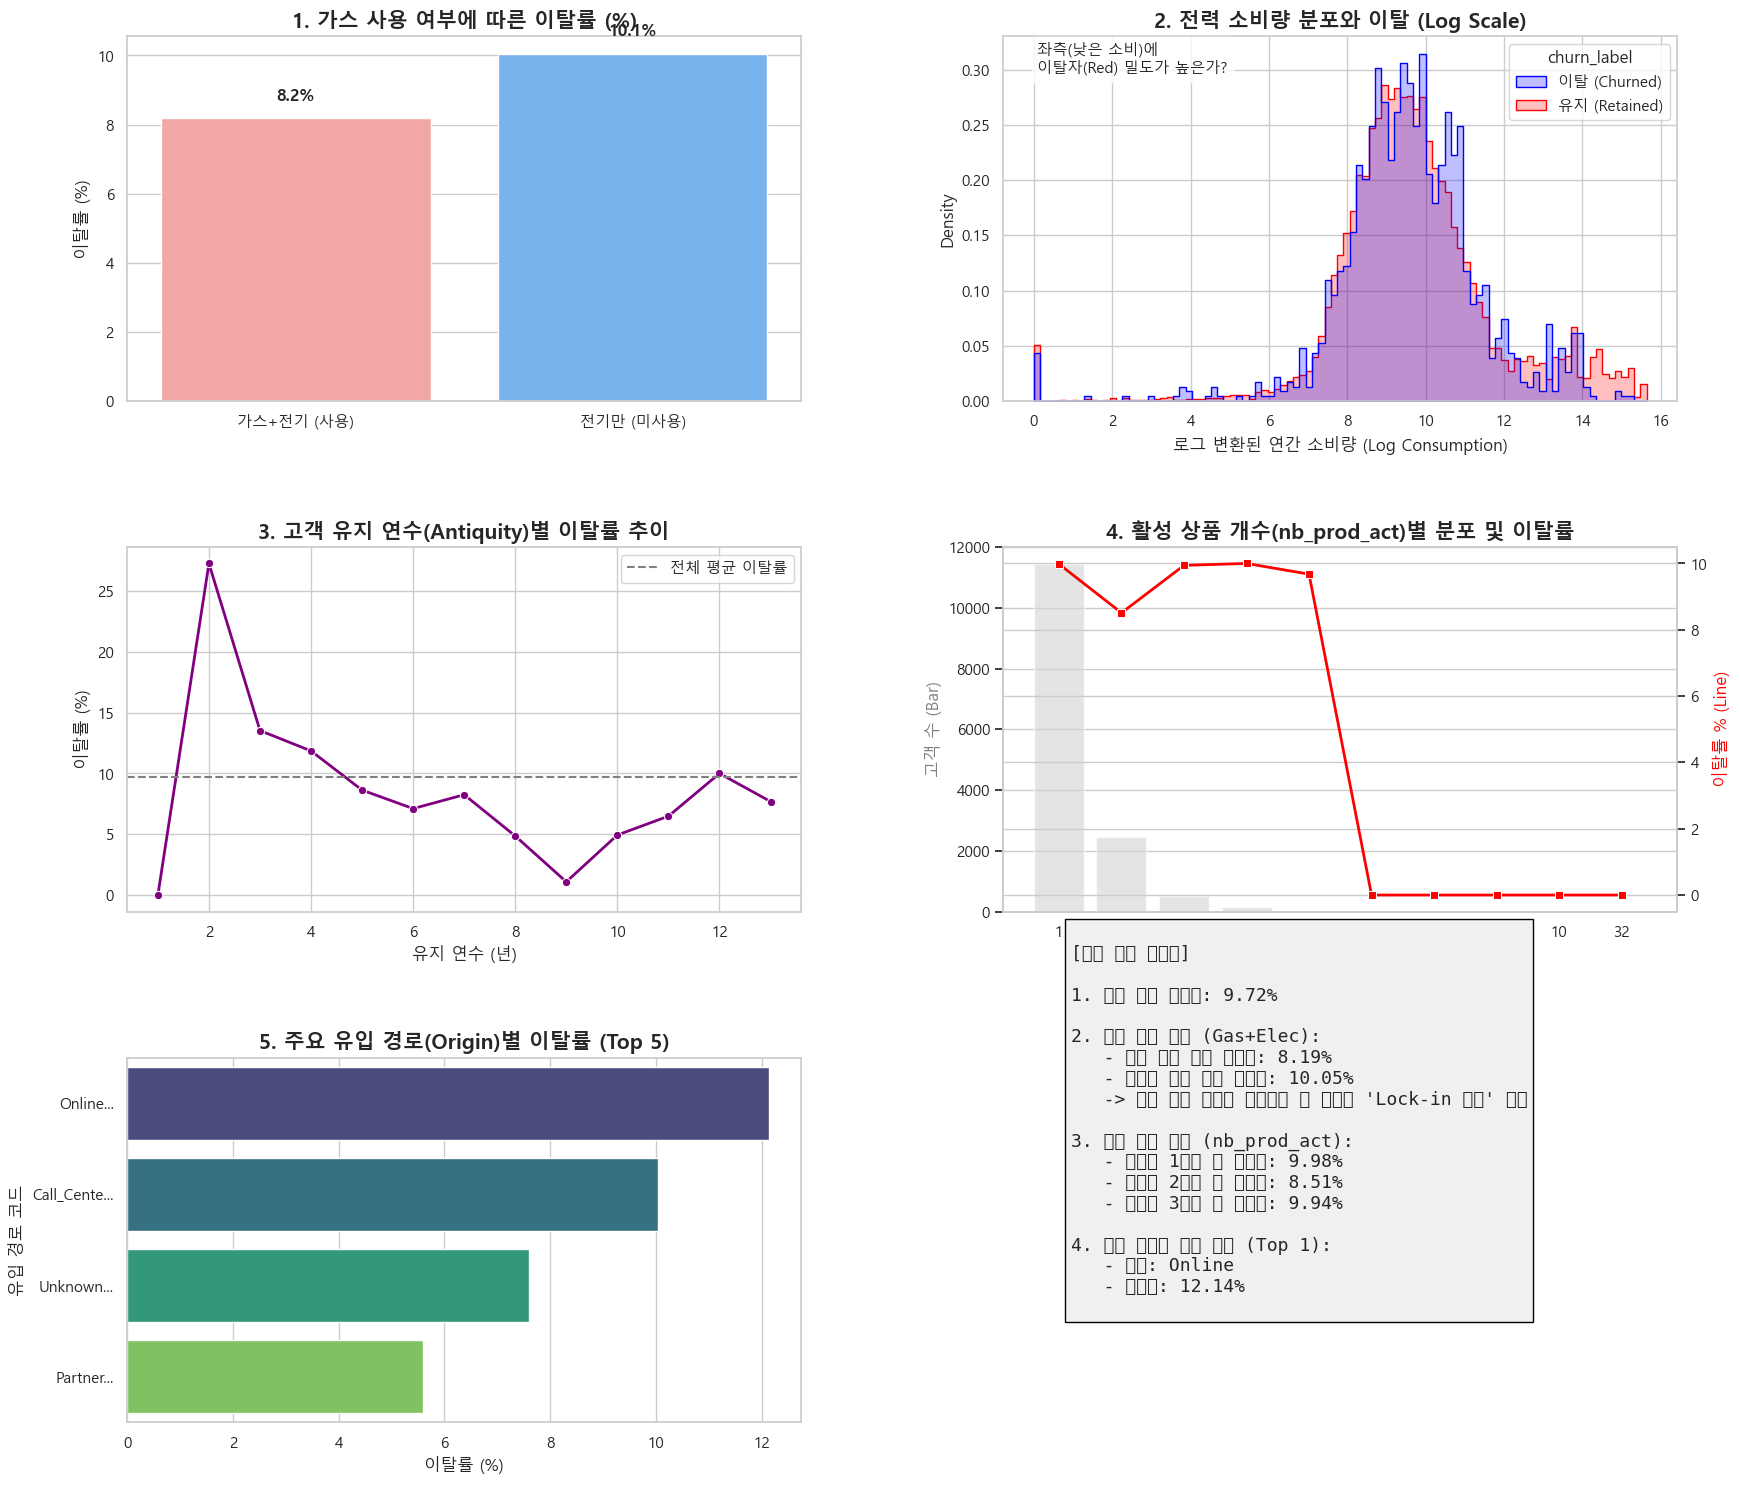

<Figure size 768x576 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
print(os.path.exists("C:/Windows/Fonts/malgun.ttf"))



# 1. 데이터 로드
file_path = '../data/02_processed/churn_data_modeling.csv'
df = pd.read_csv(file_path)

# 시각화 설정 (한글 폰트 및 스타일)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이탈 여부 라벨링 (가독성 향상)
df['churn_label'] = df['churn'].map({0: '유지 (Retained)', 1: '이탈 (Churned)'})
df['has_gas_label'] = df['has_gas'].map({'t': '가스+전기 (사용)', 'f': '전기만 (미사용)'})

# 서브플랏 설정 (3행 2열 레이아웃)
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# -----------------------------------------------------------
# 1. 가스+전기 사용자와 미사용자 이탈 비교 (결합 상품 효과)
# -----------------------------------------------------------
gas_churn = df.groupby('has_gas_label')['churn'].mean() * 100
sns.barplot(x=gas_churn.index, y=gas_churn.values, palette=['#ff9999', '#66b3ff'], ax=axes[0, 0])

axes[0, 0].set_title('1. 가스 사용 여부에 따른 이탈률 (%)', fontsize=15, fontweight='bold')
axes[0, 0].set_ylabel('이탈률 (%)')
axes[0, 0].set_xlabel('')
# 수치 표시
for i, v in enumerate(gas_churn.values):
    axes[0, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')


# -----------------------------------------------------------
# 2. 소비량과 이탈 가능성 (저전력 사용자 이탈 가설 검증)
# -----------------------------------------------------------
# 소비량 분포가 넓으므로 로그 변환 적용
df['log_cons_12m'] = np.log1p(df['cons_12m'])

sns.histplot(data=df, x='log_cons_12m', hue='churn_label', element="step", stat="density", common_norm=False, palette=['blue', 'red'], ax=axes[0, 1])
axes[0, 1].set_title('2. 전력 소비량 분포와 이탈 (Log Scale)', fontsize=15, fontweight='bold')
axes[0, 1].set_xlabel('로그 변환된 연간 소비량 (Log Consumption)')
axes[0, 1].text(0.05, 0.9, "좌측(낮은 소비)에\n이탈자(Red) 밀도가 높은가?", transform=axes[0, 1].transAxes, fontsize=11, bbox=dict(facecolor='white', alpha=0.8))


# -----------------------------------------------------------
# 3. 고객 생애주기(Antiquity)에 따른 이탈 (유지 연수별 위기 구간)
# -----------------------------------------------------------
tenure_churn = df.groupby('num_years_antig')['churn'].mean() * 100
sns.lineplot(x=tenure_churn.index, y=tenure_churn.values, marker='o', color='purple', linewidth=2, ax=axes[1, 0])
axes[1, 0].axhline(df['churn'].mean()*100, color='gray', linestyle='--', label='전체 평균 이탈률')

axes[1, 0].set_title('3. 고객 유지 연수(Antiquity)별 이탈률 추이', fontsize=15, fontweight='bold')
axes[1, 0].set_ylabel('이탈률 (%)')
axes[1, 0].set_xlabel('유지 연수 (년)')
axes[1, 0].legend()


# -----------------------------------------------------------
# 4. nb_prod_act (활성 상품 개수)별 분포 및 이탈률
# -----------------------------------------------------------
# 상품 개수별 고객 수 확인
prod_counts = df['nb_prod_act'].value_counts().sort_index()
# 상품 개수별 이탈률 확인
prod_churn = df.groupby('nb_prod_act')['churn'].mean() * 100

# 이중축 그래프 (막대: 고객수, 선: 이탈률)
ax1 = axes[1, 1]
ax2 = ax1.twinx()

sns.barplot(x=prod_churn.index, y=prod_counts.loc[prod_churn.index], color='lightgray', alpha=0.6, ax=ax1)
sns.lineplot(x=range(len(prod_churn)), y=prod_churn.values, marker='s', color='red', linewidth=2, ax=ax2)

ax1.set_title('4. 활성 상품 개수(nb_prod_act)별 분포 및 이탈률', fontsize=15, fontweight='bold')
ax1.set_xlabel('활성 상품 개수')
ax1.set_ylabel('고객 수 (Bar)', color='gray')
ax2.set_ylabel('이탈률 % (Line)', color='red')


# -----------------------------------------------------------
# 5. origin_up (고객 유입 경로) 코드별 이탈률 비교
# -----------------------------------------------------------
# 상위 5개 주요 유입 경로만 추출 (나머지는 기타 처리 가능하나 여기선 Top 5만 비교)
channel_map = {
    "foosdfpfkusacimwkcsosbicdxkicaua": "Online",
    "lmkebamcaaclubfxadlmueccxoimlema": "Partner",
    "usilxuppasemubllopkaafesmlibmsdf": "Call_Center",
    "MISSING": "Unknown"
}

df["channel_sales_clean"] = (df["channel_sales"].fillna("MISSING").map(channel_map))
top_origins = df['channel_sales_clean'].value_counts().nlargest(5).index
origin_df = df[df['channel_sales_clean'].isin(top_origins)]

origin_churn = origin_df.groupby('channel_sales_clean')['churn'].mean() * 100
origin_churn = origin_churn.sort_values(ascending=False)

sns.barplot(x=origin_churn.values, y=origin_churn.index, palette='viridis', ax=axes[2, 0])

axes[2, 0].set_title('5. 주요 유입 경로(Origin)별 이탈률 (Top 5)', fontsize=15, fontweight='bold')
axes[2, 0].set_xlabel('이탈률 (%)')
axes[2, 0].set_ylabel('유입 경로 코드')
# 코드명 텍스트 간략화 (너무 길 경우)
axes[2, 0].set_yticklabels([label[:10] + '...' for label in origin_churn.index]) 

# -----------------------------------------------------------
# 6. (보너스) 종합 요약 텍스트 출력
# -----------------------------------------------------------
axes[2,1].axis('off')
summary_text = f"""
[분석 요약 리포트]

1. 전체 평균 이탈률: {df['churn'].mean()*100:.2f}%

2. 결합 상품 효과 (Gas+Elec):
   - 가스 사용 고객 이탈률: {gas_churn['가스+전기 (사용)']:.2f}%
   - 전기만 사용 고객 이탈률: {gas_churn['전기만 (미사용)']:.2f}%
   -> 가스 사용 고객이 이탈률이 더 낮다면 'Lock-in 효과' 존재

3. 활성 상품 개수 (nb_prod_act):
   - 상품이 1개일 때 이탈률: {prod_churn.get(1, 0):.2f}%
   - 상품이 2개일 때 이탈률: {prod_churn.get(2, 0):.2f}%
   - 상품이 3개일 때 이탈률: {prod_churn.get(3, 0):.2f}%

4. 가장 위험한 유입 경로 (Top 1):
   - 코드: {origin_churn.index[0]}
   - 이탈률: {origin_churn.values[0]:.2f}%
"""
axes[2, 1].text(0.1, 0.3, summary_text, fontsize=13, family='monospace', bbox=dict(facecolor='#f0f0f0', edgecolor='black'))

plt.style.use("default")  # seaborn보다 글씨 선명
plt.figure(dpi=120)
plt.tight_layout()
plt.show()

학습 데이터 크기: (11684, 58)
테스트 데이터 크기: (2921, 58)

[모델 성능 리포트]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2637
           1       0.22      0.32      0.26       284

    accuracy                           0.82      2921
   macro avg       0.57      0.60      0.58      2921
weighted avg       0.85      0.82      0.84      2921

ROC-AUC 점수: 0.6807


c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HA

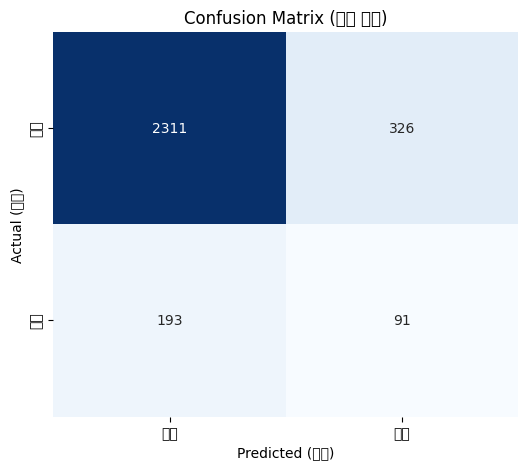

C:\Users\user\AppData\Local\Temp\ipykernel_14592\2849775023.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], palette='viridis')
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\User

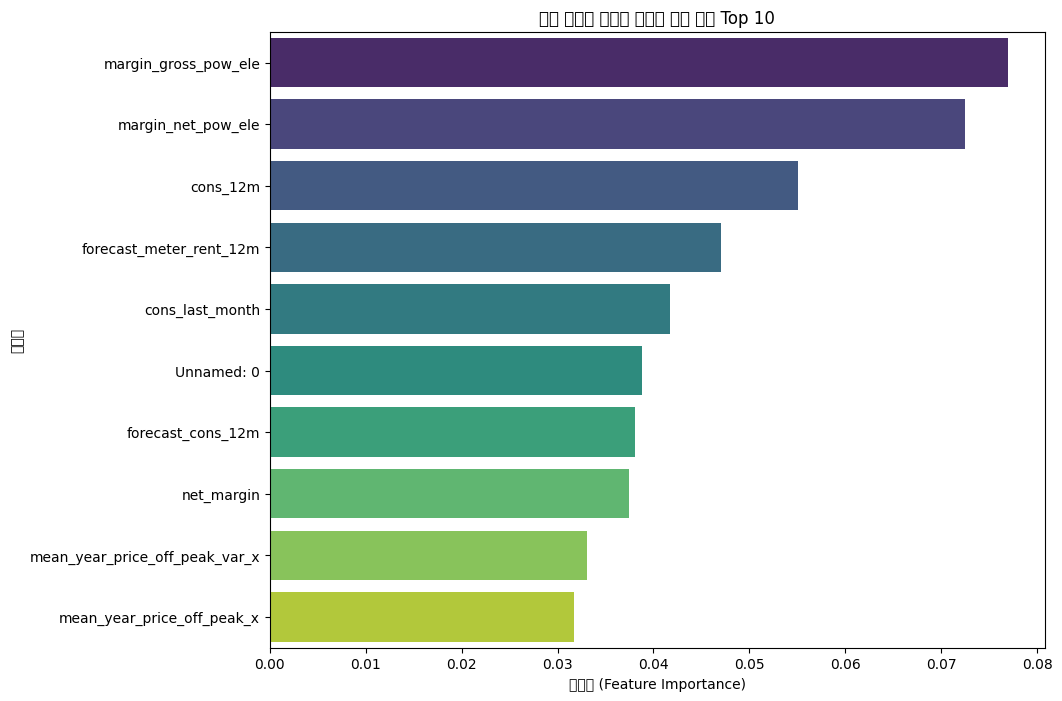


[이탈 예측 중요 변수 Top 10]
margin_gross_pow_ele              0.076968
margin_net_pow_ele                0.072463
cons_12m                          0.055031
forecast_meter_rent_12m           0.047041
cons_last_month                   0.041745
Unnamed: 0                        0.038793
forecast_cons_12m                 0.038059
net_margin                        0.037465
mean_year_price_off_peak_var_x    0.033015
mean_year_price_off_peak_x        0.031715
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드
file_path = '../data/02_processed/churn_data_modeling.csv'
df = pd.read_csv(file_path)

# -----------------------------------------------------------
# 2. 데이터 전처리 (Preprocessing)
# -----------------------------------------------------------

# 불필요한 컬럼 제거
# id: 식별자는 예측에 도움 안 됨
# date_...: 날짜 문자열은 모델이 인식 못함 (이미 num_years_antig 등 파생변수가 존재하므로 제거)
drop_cols = ['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
df_model = df.drop(columns=drop_cols, errors='ignore')

# 범주형 변수 인코딩 (Categorical Encoding)
# has_gas: t/f -> 1/0
df_model['has_gas'] = df_model['has_gas'].map({'t': 1, 'f': 0})

# 나머지 범주형 변수 (channel_sales, origin_up) -> 원-핫 인코딩 (One-Hot Encoding)
# 모델이 문자를 이해할 수 있도록 0과 1의 숫자로 변환합니다.
df_model = pd.get_dummies(df_model, columns=['channel_sales', 'origin_up'], drop_first=True)

# 결측치 처리 (Missing Values)
# 간단하게 0이나 평균으로 채우거나, 결측이 있는 행을 제거합니다. (여기선 0으로 대체)
df_model = df_model.fillna(0)

# -----------------------------------------------------------
# 3. 데이터 분리 (Train/Test Split)
# -----------------------------------------------------------
X = df_model.drop('churn', axis=1) # 독립변수 (입력)
y = df_model['churn']              # 종속변수 (타겟)

# 학습용(80%)과 테스트용(20%)으로 분리
# stratify=y: 학습/테스트 데이터에 이탈자 비율을 동일하게 맞춤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

# -----------------------------------------------------------
# 4. 모델 학습 (Random Forest)
# -----------------------------------------------------------
# class_weight='balanced': 이탈자가 적은 불균형 데이터이므로, 이탈자(1)에 가중치를 더 줌
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=10, 
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# -----------------------------------------------------------
# 5. 성능 평가 (Evaluation)
# -----------------------------------------------------------
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\n[모델 성능 리포트]")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC 점수: {roc_auc_score(y_test, y_pred_proba):.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (예측 결과)')
plt.xlabel('Predicted (예측)')
plt.ylabel('Actual (실제)')
plt.xticks([0.5, 1.5], ['유지', '이탈'])
plt.yticks([0.5, 1.5], ['유지', '이탈'])
plt.show()

# -----------------------------------------------------------
# 6. 중요 변수 추출 (Feature Importance)
# -----------------------------------------------------------
# 이탈에 영향을 주는 상위 10개 요인 파악
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], palette='viridis')
plt.title('고객 이탈에 영향을 미치는 중요 변수 Top 10')
plt.xlabel('중요도 (Feature Importance)')
plt.ylabel('변수명')
plt.show()

# Top 10 변수 텍스트 출력
print("\n[이탈 예측 중요 변수 Top 10]")
print(feature_imp.head(10))

In [ ]:
!pip install lazypredict

  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.9 MB 11.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/8.9 MB 10.7 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/8.9 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 10.9 MB/s  0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------  2.4/2.4 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 10.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------

In [ ]:
print(models)

NameError: name 'models' is not defined

In [ ]:
lazy_classify = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_classify.fit(X_train, X_test, y_train, y_test)
print(models)

NameError: name 'LazyClassifier' is not defined

In [ ]:
!pip install shap

   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 9.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------------------- ------------- 1.8/2.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.0 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.1 MB 12.2 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.1 MB 12.1 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/38.1 MB 11.9 MB/s eta 0:00:03
   ---------- ----------------------------- 10.0/38.1 MB 11.9 MB/s eta 0:00:03
   ------------- -------------------------- 12.6/38.1 MB 12.0 MB/s eta 0:00:03
   --------------- ------------------------ 14.9/38.1 MB 11.9 MB/s eta 0:00:02
   ------------------ --------------------- 17.6/38.1 MB 11.9 MB/s eta 0:00:02
   ---------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드
file_path = '../data/02_processed/churn_data_modeling.csv'
df = pd.read_csv(file_path)
